**Created by Gael AHOUANVOEDO**

**🚀 Software Professional Salary 📊 Kaggle 📈**

**24 June 2022**

# **<center><span style="color:#fd7b12;">🚀 SOFTWARE PROFESSIONAL SALARY 🚀   </span></center>**
## <center>For more information you can contact me at +221781203911👍</center>

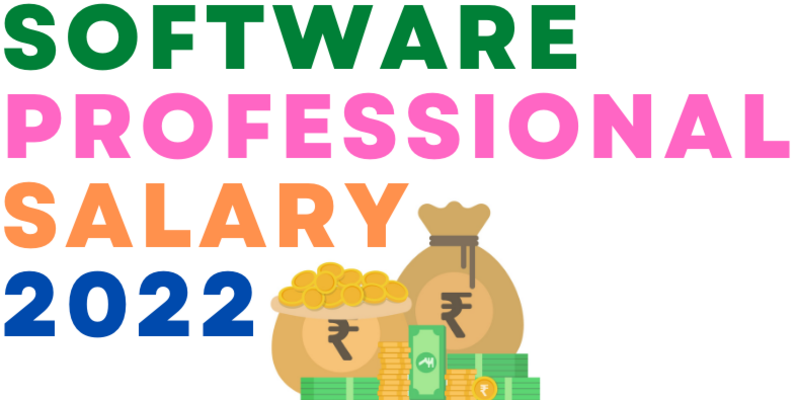

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analyse](#4)
- [5. Conclusion](#5)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### In this project I will have to exploit a dataset that contains information of 22700+ Software Professionals with different features like their Salaries (₹), Name of the Company, Company Rating, Number of times Salaries Reported, and Location of the Company.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;"> Data Wrangling </span></center>**

In [2]:
data = pd.read_csv('Software_Professional_Salaries.csv')
df = data.copy()

### Firsty, we will make a view of our datasets for seeing the different issues. We will start with dataset named 'salaries'

In [3]:
df.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
2925,4.5,Google,Android Software Engineer,240000,1,Pune
14092,3.8,ZoomRx,Software Development Engineer II,800000,2,Chennai
14528,3.5,Cyient,Software Development Engineer,372000,3,Hyderabad
9405,2.9,Fore Brain Technologies,Junior Java Developer,216000,1,Chennai
19739,3.9,Schlumberger,Software Development Engineer (SDE1),1200000,1,Pune


In [4]:
df.shape

(22774, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22774 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


### Our dataset have no missing values. I think I will put rating as the final column for a better view

In [6]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location'],
      dtype='object')

In [7]:
df = df[['Company Name', 'Job Title', 'Salary', 'Salaries Reported','Location','Rating']]
df.sample(3)

,Company Name,Job Title,Salary,Salaries Reported,Location,Rating
9666,Cognizant Technology Solutions,Java Full Stack Engineer - Intern,144000,1,Chennai,3.8
14949,Walmart,Software Development Engineer (SDE),400000,2,Hyderabad,3.3
6944,udChalo,Front End Developer,400000,1,Pune,3.8


### And remove spaces in column names

In [8]:
df = df.rename(columns = {'Company Name':'Company', 'Job Title':'Job','Salaries Reported':'Reported'})

### All values of Salary should be at leat 150 Rupies, who is equal to the minimum wage in India. Let's verify

In [9]:
df.query('Salary<150')

,Company,Job,Salary,Reported,Location,Rating


### We have zero rows, who is good. A salary should be at least reported one time

In [10]:
df.query('Reported<1')

,Company,Job,Salary,Reported,Location,Rating


### Our dataset is clean, we will save the new version of its in a CSV file

In [11]:
df.to_csv('dataset.csv')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

### Set style values for all of our visualization

In [12]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('pastel')[0:5]

## Company Name

In [13]:
df['Company'].nunique()

11263

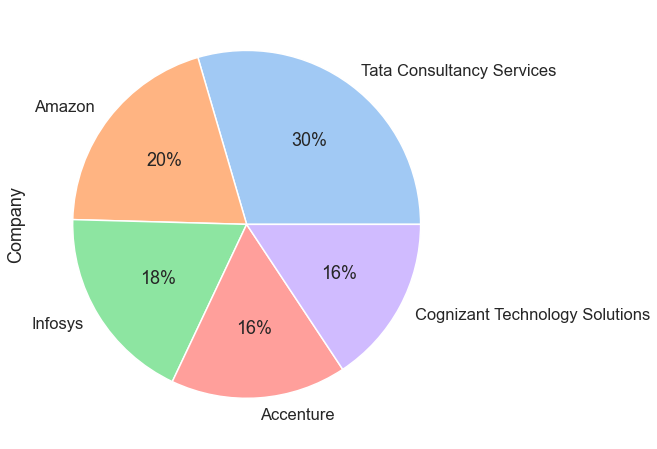

In [14]:
plt.figure(figsize=(10,8))
df['Company'].value_counts().head(5).plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.show()

> ### Tata Consultancy Services is the most rated company in the dataset. It's follow by Aamazon, Infosys, Acenture and Cognizant Technology Solutions.

## Job title

In [15]:
df['Job'].nunique()

1084

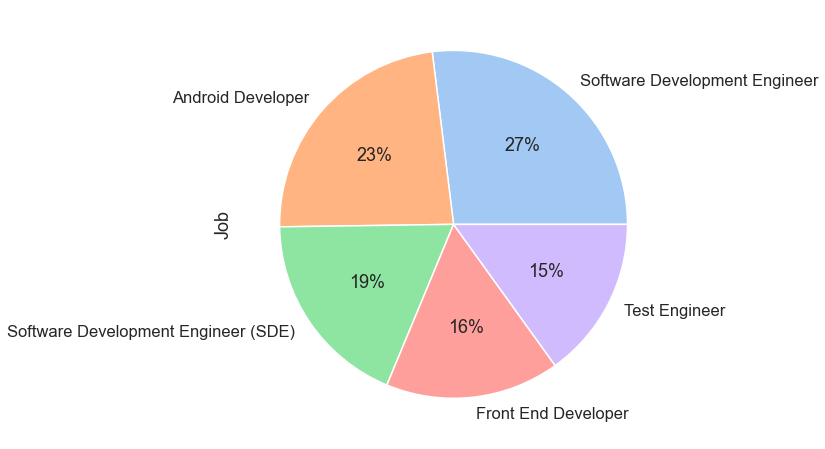

In [16]:
plt.figure(figsize=(10,8))
df['Job'].value_counts().head(5).plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.show()

> ### Software Development Egineer are the most who give they information on the website. They are follow by Android Developer, Software Development Engineer, Front End Developper and Test Engineer.

## Salary

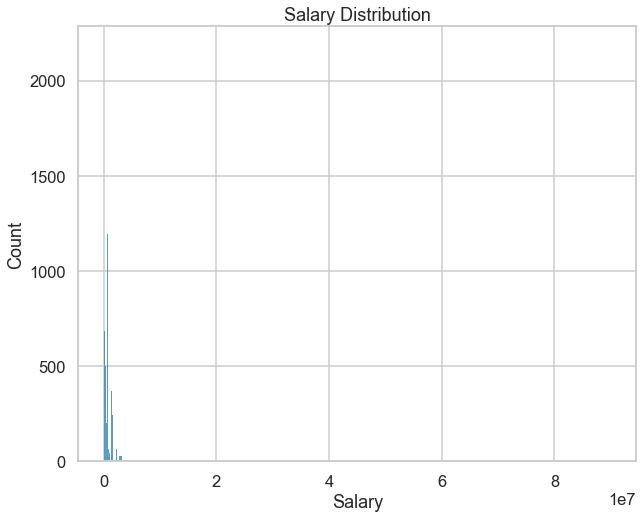

In [17]:
plt.figure(figsize=(10,8))
plt.title('Salary Distribution')
sns.histplot(df['Salary'], palette=colors)
plt.show()

### In Salary, we have too much outliers. We will cut our dataset in two group and explore each group

In [18]:
df_salary = df.query('Salary < 3000000')['Salary']

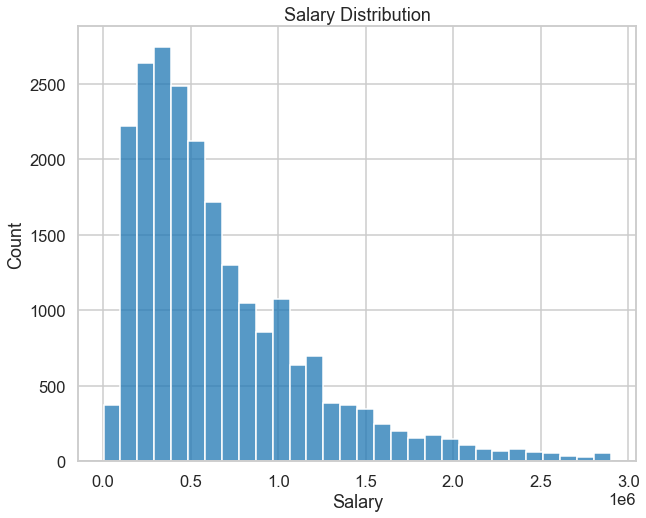

In [19]:
plt.figure(figsize=(10,8))
plt.title('Salary Distribution')
sns.histplot(df_salary, palette=colors, bins=30)
plt.show()

In [20]:
df_salary = df.query('Salary > 3000000')
df_salary.describe()

,Salary,Reported,Rating
count,2.380000e+02,238.000000,238.000000
mean,4.693067e+06,3.974790,4.010084
std,5.790197e+06,24.659868,0.464321
min,3.100000e+06,1.000000,1.600000
25%,3.300000e+06,1.000000,3.800000
50%,3.700000e+06,1.000000,4.000000
75%,4.600000e+06,1.000000,4.300000
max,9.000000e+07,353.000000,5.000000


In [21]:
print(f'Proportion of outliers in all datasets : {len(df_salary)/len(df)}')

Proportion of outliers in all datasets : 0.010450513743742864


> ### Most of workers have a low salary, if we consider they income between them. We have 238 workers with a very high salary arround 3300000 and 4600000. They reprent 1% of all workers.

## Salaries Reported

In [22]:
df['Reported'].min()

1

In [23]:
df['Reported'].max()

361

In [24]:
df['Reported'].mode()

0    1
Name: Reported, dtype: int64

## Location

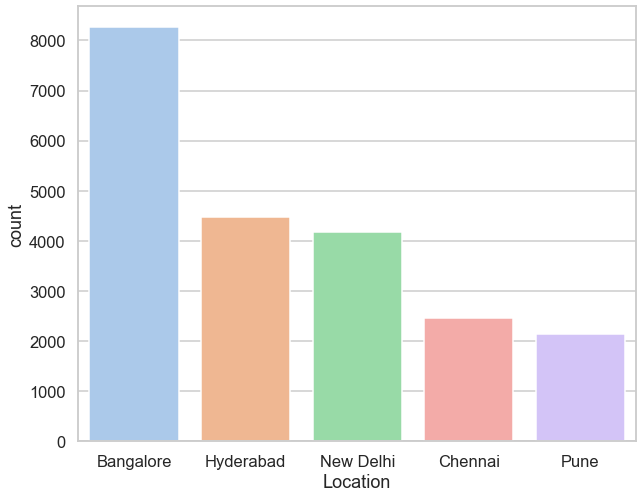

In [25]:
order2 = df.Location.value_counts().head(5).index.tolist()
plt.figure(figsize=(10,8))
sns.countplot(df.Location, palette=colors, order=order2)
plt.show()

> ### Mos of workers are from Banglore, Hyderabad, New Dehli, Chennai and Pune.

## Rating

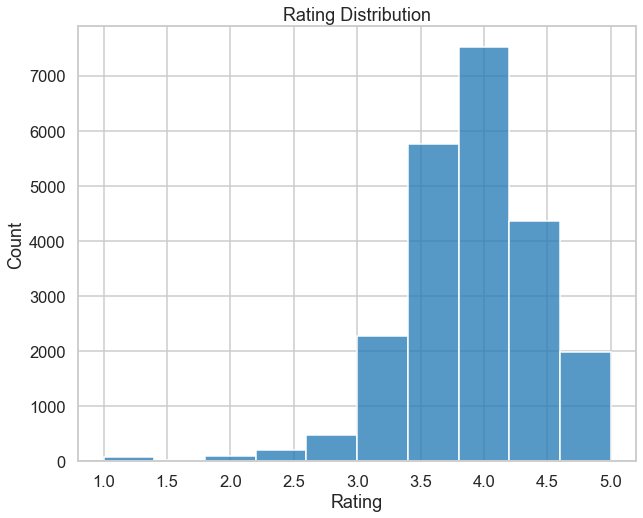

In [26]:
plt.figure(figsize=(10,8))
plt.title('Rating Distribution')
sns.histplot(df.Rating, palette=colors, bins=10)
plt.show()

> ### The workers give usually a good rating to the companies (high or equal to 3) but some can give very bad rating

### Now we will answer to some questions.

### `What are the best companies in the dataset ?`

### For make a good study, we can't take all companies rating and compare there mean. Some companies have only one rating when others can have 5 or 10. So we will determine a min of rating firstly. It's the companies who will have at least this minimum of number of rating we will compare

In [27]:
df_comp = df.Company.value_counts()

In [28]:
df_comp = pd.DataFrame(df_comp)
df_comp = df_comp.reset_index()
df_comp = df_comp.rename(columns={'index':'Company','Company':'count'})
df_comp

,Company,count
0,Tata Consultancy Services,271
1,Amazon,184
2,Infosys,169
3,Accenture,150
4,Cognizant Technology Solutions,144
...,...,...
11258,Talent Anywhere,1
11259,WisdmLabs,1
11260,Softdel,1
11261,Dentsu,1


### So with the size of our dataset and the number of value counts we can determin the min of number of rating

In [29]:
len(df)/len(df_comp)

2.0220190002663587

In [30]:
df_comp = df_comp.query('count>1')
df_comp

,Company,count
0,Tata Consultancy Services,271
1,Amazon,184
2,Infosys,169
3,Accenture,150
4,Cognizant Technology Solutions,144
...,...,...
2976,Poly Infosoft,2
2977,VAMO Systems,2
2978,Bellurbis Technologies,2
2979,Lannet Technologies,2


In [31]:
df_comp.drop(['count'], axis=1,inplace=True)
df_comp

,Company
0,Tata Consultancy Services
1,Amazon
2,Infosys
3,Accenture
4,Cognizant Technology Solutions
...,...
2976,Poly Infosoft
2977,VAMO Systems
2978,Bellurbis Technologies
2979,Lannet Technologies


### We will merge this dataset with the basic dataset inner to retrieve only the rating of choosen companies

In [32]:
df_comp = df_comp.merge(df, on = 'Company',how='inner')
df_comp

,Company,Job,Salary,Reported,Location,Rating
0,Tata Consultancy Services,Senior Android Developer,400000,2,Bangalore,3.9
1,Tata Consultancy Services,Android Applications Developer,360000,1,Bangalore,3.9
2,Tata Consultancy Services,Android Engineer,1000000,1,Bangalore,3.9
3,Tata Consultancy Services,Android Test Engineer,200000,1,Bangalore,3.9
4,Tata Consultancy Services,Android Developer,288000,1,Chennai,3.9
...,...,...,...,...,...,...
14487,Bellurbis Technologies,IOS Developer,300000,1,New Delhi,4.0
14488,Lannet Technologies,Android Developer,444000,1,New Delhi,4.0
14489,Lannet Technologies,IOS Developer,400000,1,New Delhi,4.0
14490,"U.S. District Court, Southern District of Ohio",Android Developer,300000,1,New Delhi,4.0


### Goood Gammee !!!! Now we can group the companies rating to determine the mean

In [33]:
df_comp = df_comp.groupby('Company')['Rating'].mean().sort_values(ascending=False)

### And the best companies are :

In [34]:
df_comp = pd.DataFrame(df_comp)
df_comp = df_comp.reset_index()
df_comp.query('Rating==5')

,Company,Rating
0,Tataatsu Idea Labs,5.0
1,Tiramisu New Media Solutions,5.0
2,PerfectionGeeks Technologies,5.0
3,Perfex Technologies,5.0
4,Charpixel Technologies,5.0
5,Walfin Tech,5.0
6,Expand My Business (ExMyB),5.0
7,CapitalNow,5.0
8,StraightDrive Softlab,5.0
9,Healimpilo,5.0


### `What is the salary for each job ?`

### So, remember that we have many outliers. We can explore some rows of the outliers for seeing if we can identify some indices who can help us with the treatment of them

In [35]:
df.Salary.sort_values(ascending=False)

18639    90000000
4473     10000000
9262     10000000
7123     10000000
5821      9900000
           ...   
10318       12000
16842       12000
5550        12000
9939         8448
22567        2112
Name: Salary, Length: 22774, dtype: int64

In [36]:
df.iloc[18639]

Company                       Thapar University
Job         Software Development Engineer (SDE)
Salary                                 90000000
Reported                                      1
Location                              New Delhi
Rating                                      3.6
Name: 18639, dtype: object

In [37]:
df.iloc[4473]

Company                        Concentrix
Job         Oracle Database Administrator
Salary                           10000000
Reported                                1
Location                        Bangalore
Rating                                3.8
Name: 4473, dtype: object

In [38]:
df.iloc[9262]

Company         OASYS Cybernetics
Job         Senior Java Developer
Salary                   10000000
Reported                        1
Location                  Chennai
Rating                        3.6
Name: 9262, dtype: object

In [39]:
df.iloc[7123]

Company                 Koru UX Design
Job         Senior Front End Developer
Salary                        10000000
Reported                             1
Location                          Pune
Rating                             3.5
Name: 7123, dtype: object

### Dificult to make a conclusion with the observation. But like before we can filter the number of job with a number of occurence

In [40]:
len(df)/df.Job.nunique()

21.009225092250922

### So, for an activity who have at least 21 salary reported, we will determine the mean

In [41]:
df_job = df.Job.value_counts()
df_job = pd.DataFrame(df_job)
df_job = df_job.reset_index()
df_job = df_job.rename(columns={'index':'Job','Job':'count'})
df_job

,Job,count
0,Software Development Engineer,2351
1,Android Developer,2029
2,Software Development Engineer (SDE),1614
3,Front End Developer,1412
4,Test Engineer,1314
...,...,...
1079,Java and J2EE Developer,1
1080,Techlead Java,1
1081,Java Andriod Developer,1
1082,Java Deceloper,1


In [42]:
df_job = df_job.query('count>21')
df_job

,Job,count
0,Software Development Engineer,2351
1,Android Developer,2029
2,Software Development Engineer (SDE),1614
3,Front End Developer,1412
4,Test Engineer,1314
...,...,...
88,Mobile App Developer,24
89,Front End Web Developer - Intern,23
90,Senior Software Development Engineer In Test (...,23
91,Software Development Engineer (SDE) - Contractor,23


In [43]:
df_job.drop(['count'], axis=1,inplace=True)

### And merge the dataset with the basic dataset

In [44]:
df_job = df_job.merge(df, on = 'Job',how='inner')
df_job

,Job,Company,Salary,Reported,Location,Rating
0,Software Development Engineer,Shell,156000,1,Bangalore,4.1
1,Software Development Engineer,314e,180000,1,Bangalore,4.3
2,Software Development Engineer,Conduent,300000,1,Bangalore,3.1
3,Software Development Engineer,MMACH Design,500000,1,Bangalore,4.9
4,Software Development Engineer,Intel Corporation,1200000,1,Bangalore,4.3
...,...,...,...,...,...,...
20022,Oracle Applications Database Administrator,iNetFrame Technologies,1000000,1,Bangalore,4.2
20023,Oracle Applications Database Administrator,LTI,600000,1,Bangalore,3.8
20024,Oracle Applications Database Administrator,Capgemini,500000,1,Bangalore,3.8
20025,Oracle Applications Database Administrator,Tata Consultancy Services (North America),1500000,1,Bangalore,3.8


In [45]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

### Finally we have the salary of each job sorting by the high to the low

In [46]:
df_job = df_job.groupby('Job')['Salary'].mean().sort_values(ascending=False)
df_job = pd.DataFrame(df_job)
df_job = df_job.reset_index()
df_job

,Job,Salary
0,Software Development Engineer III,2196000
1,Senior Backend Engineer,2194667
2,Lead Software Development Engineer,1844824
3,Sr Software Development Engineer,1668000
4,Software Development Engineer-II,1609889
...,...,...
88,Android Developer - Intern,250800
89,Web Developer - Intern,244644
90,Front End Developer - Intern,231192
91,Backend Process,222000


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#fd7b12;"> Conclusion </span></center>**

### `What are the best companies in the dataset ?`

### The best companies are :

In [47]:
df_comp.query('Rating==5')

,Company,Rating
0,Tataatsu Idea Labs,5
1,Tiramisu New Media Solutions,5
2,PerfectionGeeks Technologies,5
3,Perfex Technologies,5
4,Charpixel Technologies,5
5,Walfin Tech,5
6,Expand My Business (ExMyB),5
7,CapitalNow,5
8,StraightDrive Softlab,5
9,Healimpilo,5


### `What is the salary for each job ?`

### The salary of each job sorting by the high to the low

In [48]:
df_job

,Job,Salary
0,Software Development Engineer III,2196000
1,Senior Backend Engineer,2194667
2,Lead Software Development Engineer,1844824
3,Sr Software Development Engineer,1668000
4,Software Development Engineer-II,1609889
...,...,...
88,Android Developer - Intern,250800
89,Web Developer - Intern,244644
90,Front End Developer - Intern,231192
91,Backend Process,222000


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>